In [ ]:
# Titanic EDA Project - Clean, Analyze, Visualize Titanic Data
# Author: Charishma
# GitHub: https://github.com/charishma237

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#Set seaborn style
sns.set(style='whitegrid')

In [15]:
#1.load Dataset 
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
df = pd.read_csv(url)

In [16]:
#2. Explore Dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [18]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
#check for missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
#3. Clean dataset

In [27]:
#drop the columns with many missing values
#fill missing values
#for age we use mean, for embarked use mode

In [29]:
mean_age = df['age'].mean()
df['age'].fillna(mean_age,inplace=True)

C:\Users\chari\AppData\Local\Temp\ipykernel_26688\2801197295.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mean_age,inplace=True)


In [31]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

C:\Users\chari\AppData\Local\Temp\ipykernel_26688\395761809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


In [33]:
# drop rows with missing embarked
df.dropna(subset=['embarked'],inplace=True)

In [35]:
#4.Feature Engineering
df['family_size'] = df['sibsp'] + df['parch']
df['age_group'] = df['age'].apply(lambda x: 'Child' if x < 18 else 'Adult')
df['fare_level'] = df['fare'].apply(lambda x: 'Low' if x < 20 else ('Mid' if x < 50 else 'High'))
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,age_group,fare_level
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,Adult,Low
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,Adult,High
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,Adult,Low
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,Adult,High
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0,Adult,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0,Adult,Low
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0,Adult,Mid
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,3,Adult,Mid
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0,Adult,Mid


In [37]:
#5.Visualizations

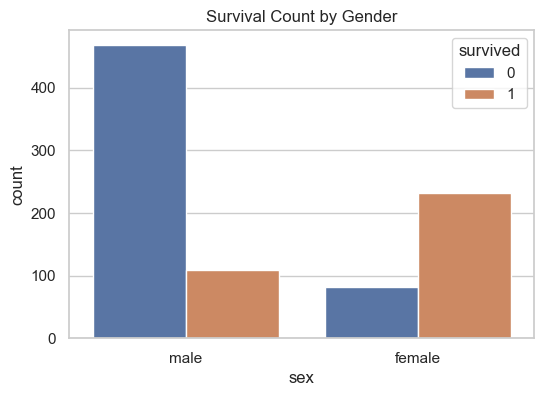

In [40]:
#5.1 Survival count by gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival Count by Gender')
plt.savefig("titanic-eda-project/plots/survival_by_gender.png")
plt.show()

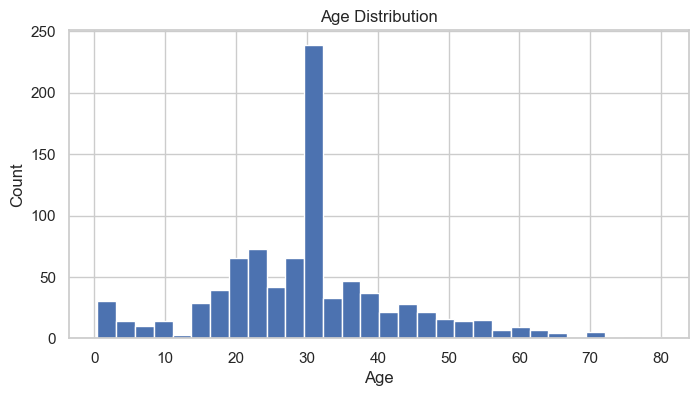

In [58]:
#5.2 Age distribution
plt.figure(figsize=(8,4))
df['age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig("titanic-eda-project/plots/age_distribution.png")
plt.show()

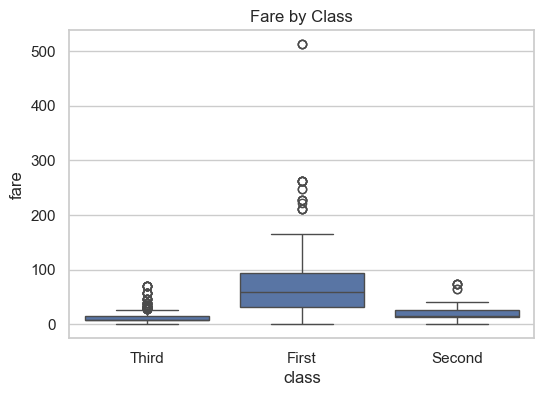

In [68]:
#5.3 Fare vs Class
plt.figure(figsize=(6, 4))
sns.boxplot(data=df,x='class',y='fare')
plt.title('Fare by Class')
plt.savefig("titanic-eda-project/plots/fare_by_class.png")
plt.show()

In [76]:
#5.4 Survival Rate by class and gender
grouped = df.groupby(['class','sex'])['survived'].mean().unstack()
grouped

sex,female,male
class,,
First,0.967391,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


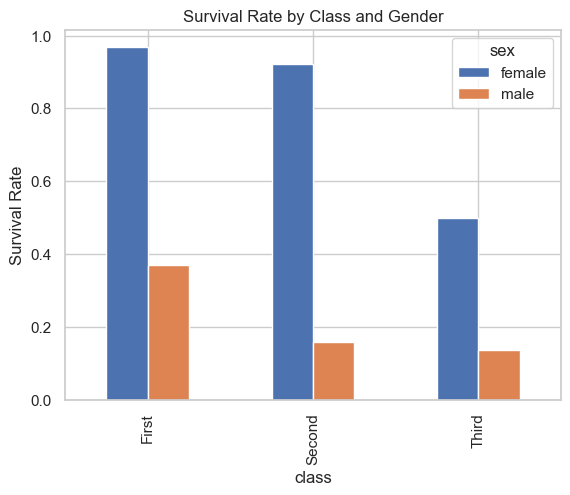

In [80]:
grouped.plot(kind='bar',stacked=False)
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.savefig("titanic-eda-project/plots/survival_rate_by_class_gender.png")
plt.show()

In [84]:
#6 Export clean data
df.to_csv("titanic-eda-project\cleaned_titanic.csv",index=False)

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\chari\AppData\Local\Temp\ipykernel_26688\3356856578.py:2: SyntaxWarning: invalid escape sequence '\c'
  df.to_csv("titanic-eda-project\cleaned_titanic.csv",index=False)


In [88]:
#7 Summary
print("\n--- Key Insights ---")
print("1. Women had significantly higher survival rates than men.")
print("2. Passengers in First Class had higher survival rates.")
print("3. Younger passengers (Children) had better chances.")
print("4. Fare tends to be higher for First Class passengers.")


--- Key Insights ---
1. Women had significantly higher survival rates than men.
2. Passengers in First Class had higher survival rates.
3. Younger passengers (Children) had better chances.
4. Fare tends to be higher for First Class passengers.


In [92]:
print("\nEDA Completed. Cleaned data saved as 'cleaned_titanic.csv'. Charts saved in 'plots/' folder.")


EDA Completed. Cleaned data saved as 'cleaned_titanic.csv'. Charts saved in 'plots/' folder.
